In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target'] = iris_df['target'].astype('category')
iris_df['target'] = iris_df['target'].cat.rename_categories(iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
X = iris_df.drop(columns='target')
y = iris_df['target']

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.3, random_state=42)

In [5]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [6]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



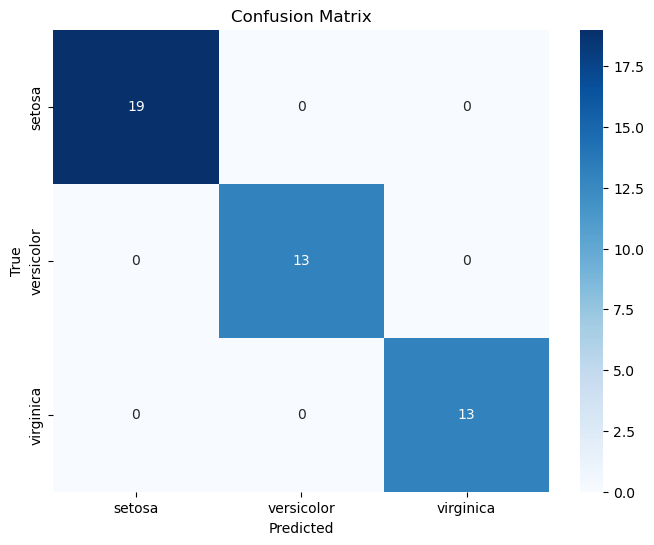

In [7]:
cm = confusion_matrix(y_test, y_pred, labels=iris.target_names)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [8]:
with open('iris_model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [9]:
with open('iris_model.pkl', 'rb') as model_file:
        test_model = pickle.load(model_file)

In [10]:
test_model.predict([[5.1, 3.5, 1.4, 0.2]]).item()

'setosa'